In [2]:
import pandas as pd

In [3]:
sports = pd.Series(
    data=["Bhutan", "Scotland", "Japan", "South Korea"],
    index=["1", "2", "3", "4"])
print(sports)

1         Bhutan
2       Scotland
3          Japan
4    South Korea
dtype: object


In [4]:
type(sports)

pandas.core.series.Series

If the indices were autogenerated then both loc and iloc seem to be identical. This is **NOT** always the case !!!

In [5]:
sports_noindex = pd.Series(sports.values)
print(sports_noindex)
print("")
print(sports_noindex.loc[0])
print(sports_noindex.iloc[0])

0         Bhutan
1       Scotland
2          Japan
3    South Korea
dtype: object

Bhutan
Bhutan


In [6]:
sports_noindex_sorted = sports_noindex.sort_values()
print(sports_noindex_sorted)
print("")
print(sports_noindex_sorted.loc[1])
print(sports_noindex_sorted.iloc[1])

0         Bhutan
2          Japan
1       Scotland
3    South Korea
dtype: object

Scotland
Japan


### Combining Series
Series can be combined by appending one to another

In [8]:
s1 = pd.Series(["A", "B", "C"])
s2 = pd.Series(["D", "E", "F"])
print(s1)
print("")
print(s2)
print("")

s3 = s1.append(s2)
print(s3)

0    A
1    B
2    C
dtype: object

0    D
1    E
2    F
dtype: object

0    A
1    B
2    C
0    D
1    E
2    F
dtype: object


/var/folders/bp/lkw_v7vd1pq8m67hb2x2mf640000gn/T/ipykernel_2087/1962000702.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s3 = s1.append(s2)


Notice the duplicate indices! Pandas permits this and selecting by `loc` will return **both** entries

In [9]:
print(s3.loc[0])

0    A
0    D
dtype: object


Using ``iloc`` will only return based on index

In [11]:
print(s3.iloc[0])

A


Also notice that if your selection of a Series results in a single entry, Pandas automatically converts it to its base type, i.e. a string in this case. If the selection consists of more than 1 entry, however, a Series is returned.

In [12]:
print(s3.loc[0])
print(type(s3.loc[0]))
print("")
print(s3.iloc[0])
print(type(s3.iloc[0]))

0    A
0    D
dtype: object
<class 'pandas.core.series.Series'>

A
<class 'str'>


#### Creating `` Dataframes`` in other form

In [13]:
col1 = pd.Series({"India": "Elephant", "Sweden": "Reindeer"})
col2 = pd.Series({"India": "New Delhi", "Sweden": "Stockholm"})
print(col1)
print()
print(col2)

India     Elephant
Sweden    Reindeer
dtype: object

India     New Delhi
Sweden    Stockholm
dtype: object


In [14]:
df = pd.DataFrame(data={"Animal": col1, "Capital": col2})
df

,Animal,Capital
India,Elephant,New Delhi
Sweden,Reindeer,Stockholm


Pandas' flexibility lets us cut out the middle man and use nested dictionaries. The keys of the outer dictionary become the column names and those of the inner dictionary become the row names.

In [15]:
df = pd.DataFrame({
    "Animal": {
        "India": "Elephant",
        "Sweden": "Reindeer"},
    "Capital": {
        "India": "New Delhi",
        "Sweden": "Stockholm"}})
df

,Animal,Capital
India,Elephant,New Delhi
Sweden,Reindeer,Stockholm


In [16]:
df = pd.DataFrame({
    'Animal':['a','a'],
    'Capital':['b','b']
},
    index =['India','Sweden'])

df

,Animal,Capital
India,a,b
Sweden,a,b


# Importing and Exporting Data
Most often we don't create data within our code but read it from external sources. Pandas has a large collection of importing (and corresponding exporting) functions available.

| Data | Reader | Writer |
| --- | --- | --- |
| CSV | `read_csv` | `to_csv` |
| JSON | `read_json` | `to_json` |
| HTML | `read_html` | `to_html` |
| Local clipboard | `read_clipboard` | `to_clipboard` |
| Excel | `read_excel` | `to_excel` |
| HDF5 | `read_hdf` | `to_hdf` |
| Feather | `read_feather` | `to_feather` |
| Parquet | `read_parquet` | `to_parquet` |
| Msgpack | `read_msgpack` | `to_msgpack` |
| Stata | `read_stata` | `to_stata` |
| SAS | `read_sas` |  |
| Python Picke Format | `read_pickle` | `to_pickle` |
| SQL | `read_sql` | `to_sql` |
| Google Big Query | `read_gbq` | `to_gbq` |

http://pandas.pydata.org/pandas-docs/stable/io.html

In [29]:
iris_orginal = pd.read_csv("iris.csv")
iris_orginal

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [22]:
iris = pd.read_csv("iris.csv", index_col="variety")
# Use head() to print only the first few lines
iris.head()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.1,3.5,1.4,0.2
Setosa,4.9,3.0,1.4,0.2
Setosa,4.7,3.2,1.3,0.2
Setosa,4.6,3.1,1.5,0.2
Setosa,5.0,3.6,1.4,0.2


In [23]:
iris = pd.read_csv("iris.csv", index_col=0)
iris.head()

,sepal.width,petal.length,petal.width,variety
sepal.length,,,,
5.1,3.5,1.4,0.2,Setosa
4.9,3.0,1.4,0.2,Setosa
4.7,3.2,1.3,0.2,Setosa
4.6,3.1,1.5,0.2,Setosa
5.0,3.6,1.4,0.2,Setosa


#### Writing CSV
Writing CSV files is as straightforward as it gets. Notice that these functions are now methods of the specific objects, not of base Pandas

In [24]:
!ls
# For windows:
# !dir

Advanced_Pandas_Practices.ipynb
Argparse_practis.py
Drow_line.py
Main_Test.py
Main_Tutorial.py
Maze_practis.ipynb
OOP_abilities_tutorial.ipynb
Pandas_Fund_lotfi.ipynb
Tutorail_Argparse.py
Tutorial_For_OS_GLOB.ipynb
Tutorial_Object_Oriented_programming.ipynb
__pycache__
athlete_events.csv
exercise_OOP.ipynb
first_dir_1
hell.py
iris.csv
iris_1.csv
iris_2.csv
iris_3.csv
maze_dir
multi_array.npz
numpy_tutorial.ipynb
olympic_event.csv
pandas_image.png
pandas_lotfi.ipynb
pandas_tutorial.ipynb
practice.ipynb
random_array.npy
second_dir
sections
test_dataset_olympic.ipynb
two_side_play


In [25]:
iris.to_csv("iris_write.csv")

In [26]:
!ls
# For windows:
# !dir

Advanced_Pandas_Practices.ipynb
Argparse_practis.py
Drow_line.py
Main_Test.py
Main_Tutorial.py
Maze_practis.ipynb
OOP_abilities_tutorial.ipynb
Pandas_Fund_lotfi.ipynb
Tutorail_Argparse.py
Tutorial_For_OS_GLOB.ipynb
Tutorial_Object_Oriented_programming.ipynb
__pycache__
athlete_events.csv
exercise_OOP.ipynb
first_dir_1
hell.py
iris.csv
iris_1.csv
iris_2.csv
iris_3.csv
iris_write.csv
maze_dir
multi_array.npz
numpy_tutorial.ipynb
olympic_event.csv
pandas_image.png
pandas_lotfi.ipynb
pandas_tutorial.ipynb
practice.ipynb
random_array.npy
second_dir
sections
test_dataset_olympic.ipynb
two_side_play


,sepal.width,petal.length,petal.width,variety
sepal.length,,,,
5.1,3.5,1.4,0.2,Setosa
4.9,3.0,1.4,0.2,Setosa
4.7,3.2,1.3,0.2,Setosa
4.6,3.1,1.5,0.2,Setosa
5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...
6.7,3.0,5.2,2.3,Virginica
6.3,2.5,5.0,1.9,Virginica
6.5,3.0,5.2,2.0,Virginica


In [33]:
iris_orginal

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [37]:
print(iris_orginal.iloc[4]["sepal.width"])

3.6


In [40]:
display(iris_orginal.loc[:, ["sepal.width"]])
print()
print(iris_orginal.loc[:, "sepal.width"][4])

,sepal.width
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6
...,...
145,3.0
146,2.5
147,3.0
148,3.4



3.6


In [41]:
iris_orginal["sepal.width"] > 3.2

0       True
1      False
2      False
3      False
4       True
       ...  
145    False
146    False
147    False
148     True
149    False
Name: sepal.width, Length: 150, dtype: bool

In [43]:
iris_orginal.loc[iris_orginal["sepal.width"] > 3.2]

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
10,5.4,3.7,1.5,0.2,Setosa
11,4.8,3.4,1.6,0.2,Setosa
14,5.8,4.0,1.2,0.2,Setosa
15,5.7,4.4,1.5,0.4,Setosa
16,5.4,3.9,1.3,0.4,Setosa


In [45]:
iris_orginal.loc[iris_orginal["sepal.width"] > 3.2, ["variety", "sepal.length"]]

,variety,sepal.length
0,Setosa,5.1
4,Setosa,5.0
5,Setosa,5.4
6,Setosa,4.6
7,Setosa,5.0
10,Setosa,5.4
11,Setosa,4.8
14,Setosa,5.8
15,Setosa,5.7
16,Setosa,5.4


In [46]:
iris_orginal.loc[0,'sepal.width']

3.5

In [48]:
iris_orginal.iloc[0]['variety']

'Setosa'

#### Exercise 1

Read choclate dataset and check 10 samples from up and down.
___
Select only the chocolates with "Congo" as the country of origin and show only the rating, the cocoa percent, and the country of origin (to make sure we've selected the right products)

In [94]:
choc = pd.read_csv("choclate.csv")
choc.head(10)

,Unnamed: 0,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
3,3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,4,2546,5150,U.S.A.,2021,NaN,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00
5,5,2546,5150,U.S.A.,2021,Uganda,"Semuliki Forest, batch 1",80%,"3- B,S,C","mildly bitter, basic cocoa, fatty",3.25
6,6,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",68%,"3- B,S,C","milk brownie, macadamia,chewy",3.50
7,7,797,A. Morin,France,2012,Bolivia,Bolivia,70%,"4- B,S,C,L","vegetal, nutty",3.50
8,8,797,A. Morin,France,2012,Peru,Peru,63%,"4- B,S,C,L","fruity, melon, roasty",3.75
9,9,1011,A. Morin,France,2013,Panama,Panama,70%,"4- B,S,C,L","brief fruit note, earthy, nutty",2.75


In [95]:
choc.tail(10)

,Unnamed: 0,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
2520,2520,801,Zotter,Austria,2012,Blend,Amazonas Frucht,65%,"4- B,S*,C,Sa","dairy, burnt caramel, coffee",3.50
2521,2521,875,Zotter,Austria,2012,Peru,"Satipo Pangoa region, 20hr conche",70%,"4- B,S*,C,Sa","butterscotch, pepper",3.50
2522,2522,883,Zotter,Austria,2012,Blend,"Indianer, Raw",58%,"4- B,S*,C,Sa","smooth, spicy, floral",3.50
2523,2523,875,Zotter,Austria,2012,Dominican Republic,"Loma Los Pinos, Yacao region, D.R.",62%,"4- B,S*,C,Sa","spice, caramel, toffee, salty",3.75
2524,2524,879,Zotter,Austria,2012,Dominican Republic,Santo Domingo,70%,"4- B,S*,C,Sa","strawberry, Cadbury egg",3.75
2525,2525,1205,Zotter,Austria,2014,Blend,Raw,80%,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C","strong nutty, marshmallow",3.75
2527,2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75%,"3- B,S,C","fatty, earthy, cocoa",3.00
2528,2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70%,"3- B,S,C","fatty, mild nuts, mild fruit",3.25
2529,2529,2170,Zotter,Austria,2018,Belize,Maya Mtn,72%,"3- B,S,C","muted, roasty, accessible",3.50


In [96]:
choc.loc[
    choc["Country of Bean Origin"] == "Congo",
    ["Cocoa Percent", "Rating", "Country of Bean Origin"]]

,Cocoa Percent,Rating,Country of Bean Origin
157,72%,3.75,Congo
282,82%,3.50,Congo
412,70%,3.50,Congo
536,68%,3.50,Congo
1715,70%,3.75,Congo
1766,70%,3.00,Congo
1942,75%,2.75,Congo
2327,65%,3.25,Congo
2510,65%,3.00,Congo
2518,68%,3.25,Congo


#### Exercise 4
Oh no! There was a mistake in the data entry. One of the products has a missing country of origin. Please find it, replace it with "Venezuela", and save the fixed data frame as "chocolate_fixed.csv"

  - You can use `*.isna()` to identify which entry of a series is either `NaN` or `None`, e.g. `mySeries.isna()`
  - You can assign values to data frames just like you would to lists, e.g. `df.iloc[0, 5] = 15`

In [97]:
choc[choc["Country of Bean Origin"].isna()]

,Unnamed: 0,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
4,4,2546,5150,U.S.A.,2021,NaN,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.0
18,18,1015,A. Morin,France,2013,NaN,Chuao,70%,"4- B,S,C,L","oily, nut, caramel, raspberry",4.0


In [101]:
choc.loc[choc["Country of Bean Origin"].isna(),
         ["Country of Bean Origin"]] = "Venezuela"
choc.to_csv("chocolate_fixed.csv")

In [106]:
choc.iloc[[4]]

,Unnamed: 0,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
4,4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.0


In [107]:
choc.iloc[[18]]

,Unnamed: 0,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
18,18,1015,A. Morin,France,2013,Venezuela,Chuao,70%,"4- B,S,C,L","oily, nut, caramel, raspberry",4.0


The most important aggregation function is `*.apply()`, which applies an arbitrary function to each row/column.

In [108]:
df = pd.DataFrame([[1,1,1], [2,2,2], [3,3,3]])
df

,0,1,2
0,1,1,1
1,2,2,2
2,3,3,3


In [109]:
print(df.sum(axis='columns'))
print(df.sum())

0    3
1    6
2    9
dtype: int64
0    6
1    6
2    6
dtype: int64


In [110]:
display(df)
df.apply(lambda x: sum(x**2), axis='columns')

,0,1,2
0,1,1,1
1,2,2,2
2,3,3,3


0     3
1    12
2    27
dtype: int64

`*.apply()` is slower than the built-in functions, so should not be used for simple operations that can also be solved with direct operations on data frames.

In [111]:
df = pd.DataFrame([[1,1,1], [2,2,2], [3,3,3]])

%timeit df.apply(lambda x: sum(x**2))
%timeit (df**2).sum()

287 µs ± 1.66 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
159 µs ± 12.6 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Also take care that the function will be applied to all columns, regardless of type. The built-in functions are clever enough to skip columns for which they are not defined.

In [112]:
df = pd.DataFrame({
    "Age": [10, 12, 12],
    "Name": ["Liz", "John", "Sam"]})
display(df)
df.sum()

# Uncomment for exception
# df.apply(lambda x: sum(x), axis="rows")

,Age,Name
0,10,Liz
1,12,John
2,12,Sam


Age             34
Name    LizJohnSam
dtype: object

### Grouping
A core functionality of Pandas is the ability to group data frames and apply functions to each individual group. The function `*.groupby(...)` defines groups based on common labels. Aggregators applied to this grouped data frame are then applied to each group individually.

In [113]:
df = pd.DataFrame({
    "Height": [178, 182, 158, 167, 177, 174, 175, 185],
    "Age": [24, 33, 32, 18, 21, 28, 22, 29],
    "Gender": ["M", "M", "F", "F", "M", "F", "M", "F"]})
display(df)
print(df.groupby("Gender"))
display(df.groupby("Gender").mean())

,Height,Age,Gender
0,178,24,M
1,182,33,M
2,158,32,F
3,167,18,F
4,177,21,M
5,174,28,F
6,175,22,M
7,185,29,F


,Height,Age
Gender,,
F,171.0,26.75
M,178.0,25.00


We can also select columns without disturbing the grouping

,Height
Gender,
F,171.0
M,178.0


<Axes: ylabel='Gender'>

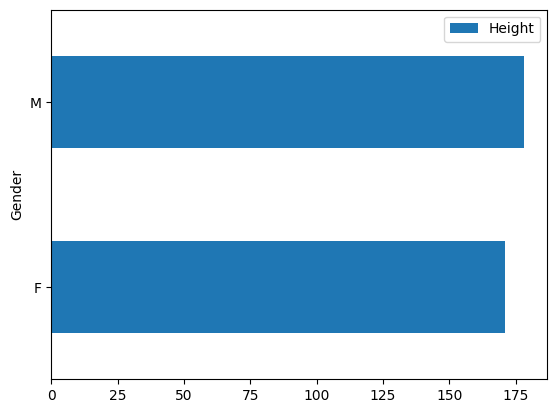

In [114]:
# grouping...

print(df.groupby("Gender")["Height"])
display(df.groupby("Gender")[["Height"]].mean())
df.groupby("Gender")[["Height"]].mean().plot(kind='barh')

<Axes: title={'center': 'Genders Information'}, ylabel='Gender'>

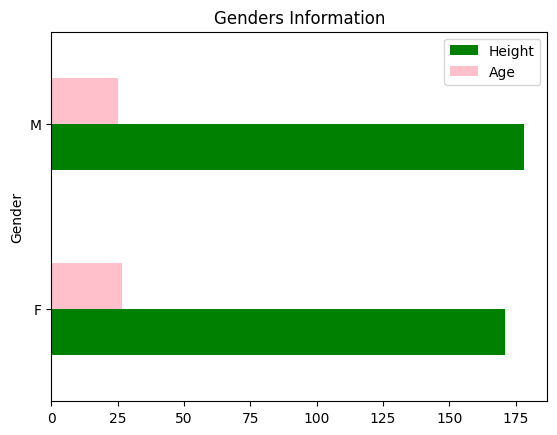

In [119]:
df1 = df.groupby('Gender').mean()
df1.plot.barh(title="Genders Information", 
             color={"green", "pink"}) 

<Axes: title={'center': 'Genders Information'}, xlabel='Gender'>

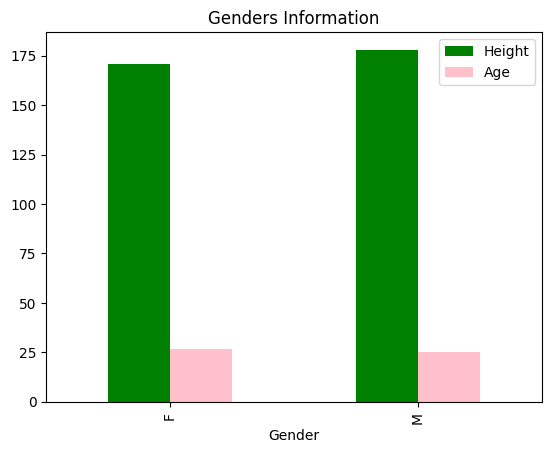

In [120]:
df1 = df.groupby('Gender').mean()
df1.plot.bar(title="Genders Information", 
             color={"green", "pink"}) 

A useful function is `size()`, which counts how large each of the groups is.

In [121]:
# size is actually calculating the number of M and F

df.groupby("Gender").size()

Gender
F    4
M    4
dtype: int64

### Unique and Duplicated Values
Two functions can help us identify unique and duplicated values within Series objects. They are aptly names `unique()` and `duplicated()`, respectively.

#### unique
`*.unique()` returns only unique values of a Series object.

In [123]:
series = pd.Series([1,2,3,2,3,4,3,5])
series.unique()

array([1, 2, 3, 4, 5])

#### duplicated
`*.duplicated()` identifies duplicated values in Series objects and returns a boolean Series. Entries that have already been seen are marked as `True` while new values are marked as `False`.

In [126]:
series = pd.Series([1,2,3,2,3,4,3,5])
series.duplicated()

0    False
1    False
2    False
3     True
4     True
5    False
6     True
7    False
dtype: bool

In [127]:
series[series.duplicated()]

3    2
4    3
6    3
dtype: int64

<Axes: >

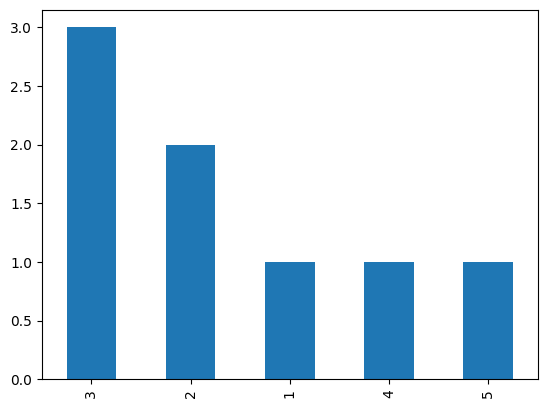

In [128]:
series.value_counts().plot(kind='bar')

In [129]:
series.value_counts()

3    3
2    2
1    1
4    1
5    1
dtype: int64

When applied to Dataframes, `duplicated()` compares **ENTIRE ROWS** for duplicates.

In [130]:
df = pd.DataFrame([
    ["Dog", 5],
    ["Cat", 4],
    ["Dog", 5],
    ["Fish", 2],
    ["Cat", 8]],
    columns=["Animal", "Age"])
display(df)
display(df.duplicated())

,Animal,Age
0,Dog,5
1,Cat,4
2,Dog,5
3,Fish,2
4,Cat,8


0    False
1    False
2     True
3    False
4    False
dtype: bool

To remove duplicated rows from a data frame we could therefore do the following

In [131]:
df.loc[~df.duplicated()]

,Animal,Age
0,Dog,5
1,Cat,4
3,Fish,2
4,Cat,8


In [132]:
# get the unique values in a column

df.Animal.unique().tolist()

['Dog', 'Cat', 'Fish']

## Merge Data Frames
Pandas data frames can be treated like SQL tables and joined.

In [133]:
sales = pd.DataFrame({
    "Date": pd.date_range(start="2018-10-01", end="2018-10-07"),
    "ItemID": ["A401", "C776", "A401", "FY554", "Y98R", "Y98R", "FY554"]})
sales

,Date,ItemID
0,2018-10-01,A401
1,2018-10-02,C776
2,2018-10-03,A401
3,2018-10-04,FY554
4,2018-10-05,Y98R
5,2018-10-06,Y98R
6,2018-10-07,FY554


In [134]:
item_info = pd.DataFrame({
    "ID": ["A401", "C776", "FY554", "Y98R"],
    "Name": ["Toaster", "Vacuum Cleaner", "Washing Machine", "Clothes Iron"],
    "Price": [25, 220, 540, 85]})
item_info

,ID,Name,Price
0,A401,Toaster,25
1,C776,Vacuum Cleaner,220
2,FY554,Washing Machine,540
3,Y98R,Clothes Iron,85


In [135]:
sales.merge(right=item_info, how="inner", left_on="ItemID", right_on="ID")

,Date,ItemID,ID,Name,Price
0,2018-10-01,A401,A401,Toaster,25
1,2018-10-03,A401,A401,Toaster,25
2,2018-10-02,C776,C776,Vacuum Cleaner,220
3,2018-10-04,FY554,FY554,Washing Machine,540
4,2018-10-07,FY554,FY554,Washing Machine,540
5,2018-10-05,Y98R,Y98R,Clothes Iron,85
6,2018-10-06,Y98R,Y98R,Clothes Iron,85


Merge types:
- **Inner**: keep only rows with corresponding IDs found in *both* data frames
- **Left**: use only rows with IDs found in the left data frame
- **Right**: use only rows with IDs found in the right data frame
- **Outer**: use all keys that are in at least one of the data frames. This is essentially the combination of left and right joins

Missing data will be replaced by `NaN` values

In [136]:
sales = pd.DataFrame({
    "Date": pd.date_range(start="2018-10-01", end="2018-10-07"),
    "ItemID": ["A401", "ZZZC776", "A401", "ZZZFY554", "Y98R", "Y98R", "FY554"]})
display(sales)
item_info = pd.DataFrame({
    "ID": ["A401", "C776", "FY554", "Y98R", "U1776"],
    "Name": ["Toaster", "Vacuum Cleaner", "Washing Machine", "Clothes Iron", "Computer"],
    "Price": [25, 220, 540, 85, 899]})
display(item_info)

,Date,ItemID
0,2018-10-01,A401
1,2018-10-02,ZZZC776
2,2018-10-03,A401
3,2018-10-04,ZZZFY554
4,2018-10-05,Y98R
5,2018-10-06,Y98R
6,2018-10-07,FY554


,ID,Name,Price
0,A401,Toaster,25
1,C776,Vacuum Cleaner,220
2,FY554,Washing Machine,540
3,Y98R,Clothes Iron,85
4,U1776,Computer,899


In [137]:
sales.merge(right=item_info, how="inner", left_on="ItemID", right_on="ID")

,Date,ItemID,ID,Name,Price
0,2018-10-01,A401,A401,Toaster,25
1,2018-10-03,A401,A401,Toaster,25
2,2018-10-05,Y98R,Y98R,Clothes Iron,85
3,2018-10-06,Y98R,Y98R,Clothes Iron,85
4,2018-10-07,FY554,FY554,Washing Machine,540


In [138]:
sales.merge(right=item_info, how="left", left_on="ItemID", right_on="ID")

,Date,ItemID,ID,Name,Price
0,2018-10-01,A401,A401,Toaster,25.0
1,2018-10-02,ZZZC776,NaN,NaN,NaN
2,2018-10-03,A401,A401,Toaster,25.0
3,2018-10-04,ZZZFY554,NaN,NaN,NaN
4,2018-10-05,Y98R,Y98R,Clothes Iron,85.0
5,2018-10-06,Y98R,Y98R,Clothes Iron,85.0
6,2018-10-07,FY554,FY554,Washing Machine,540.0


In [139]:
sales.merge(right=item_info, how="right", left_on="ItemID", right_on="ID")

,Date,ItemID,ID,Name,Price
0,2018-10-01,A401,A401,Toaster,25
1,2018-10-03,A401,A401,Toaster,25
2,NaT,NaN,C776,Vacuum Cleaner,220
3,2018-10-07,FY554,FY554,Washing Machine,540
4,2018-10-05,Y98R,Y98R,Clothes Iron,85
5,2018-10-06,Y98R,Y98R,Clothes Iron,85
6,NaT,NaN,U1776,Computer,899


In [140]:
sales.merge(right=item_info, how="outer", left_on="ItemID", right_on="ID")

,Date,ItemID,ID,Name,Price
0,2018-10-01,A401,A401,Toaster,25.0
1,2018-10-03,A401,A401,Toaster,25.0
2,2018-10-02,ZZZC776,NaN,NaN,NaN
3,2018-10-04,ZZZFY554,NaN,NaN,NaN
4,2018-10-05,Y98R,Y98R,Clothes Iron,85.0
5,2018-10-06,Y98R,Y98R,Clothes Iron,85.0
6,2018-10-07,FY554,FY554,Washing Machine,540.0
7,NaT,NaN,C776,Vacuum Cleaner,220.0
8,NaT,NaN,U1776,Computer,899.0


We can also merge on indices, either of one or both of the data frames

In [141]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display(df1, df2)

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [142]:
df1 = df1.set_index("employee")
df2 = df2.set_index("employee")
display(df1, df2)

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR


,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012
Sue,2014


In [143]:
df1.merge(df2, left_index=True, right_index=True)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [144]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
df2 = df2.set_index("employee")
display(df1, df2)

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012
Sue,2014


In [145]:
df1.merge(df2, left_on="employee", right_index=True)

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


### Congratulation you've done Pandas so, you can use your Knowledge for little data exploratory

#### Let's go for doing some practices with an excellent dataset  ``Olympic``